In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.datasets import make_blobs

In [2]:
def clusters_1(N):
    # Згенеруємо випадкові дані для прикладу
    angl = np.random.rand(N, 1) * 2 * np.pi
    
    X1 = 10 + 10 * np.sin(angl) * np.random.rand(N, 1)
    Y1 = 25 + 10 * np.cos(angl) * np.random.rand(N, 1)

    angl = np.random.rand(N, 1) * 2 * np.pi

    X2 = 3 + 10 * np.sin(angl) * np.random.rand(N, 1)
    Y2 = 0 + 8 * np.cos(angl) * np.random.rand(N, 1)

    angl = np.random.rand(N, 1) * 2 * np.pi

    X3 = 20 + 10 * np.sin(angl) * np.random.rand(N, 1)
    Y3 = -15 + 10 * np.cos(angl) * np.random.rand(N, 1)

    X = np.concatenate((X1, X2, X3))
    Y = np.concatenate((Y1, Y2, Y3))
    return X, Y

In [2]:
def clusters_2(N):
    centers = ((1, 1), (5, 10), (10, 12), (5, 7), (3, 2), (1, 4), (1, 6))
    X, Y = make_blobs(n_samples=N, cluster_std=1, centers=centers)
    return X, Y

In [3]:
N = 2000
X, Y = clusters_2(N)

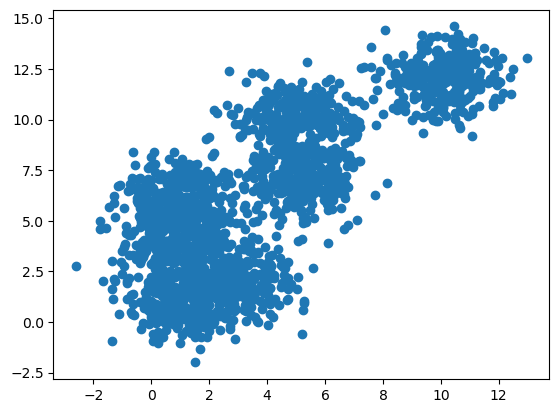

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
#normalization
p = 0
b = 2
#M = np.asarray([X,Y]).T.reshape(k * N,2)
M = X
M[:,0] = M[:,0] / M[:,0].max()
M[:,1] = M[:,1] / M[:,1].max()
M[:,0] = M[:,0] + M[:,0].max()
M[:,1] = M[:,1] + M[:,1].max()

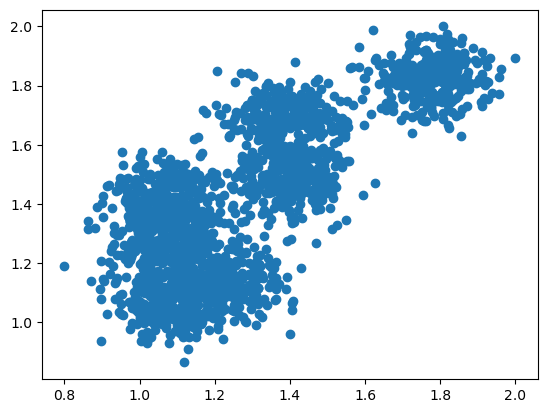

In [6]:
plt.scatter(M[:,0], M[:,1])
plt.show()

In [7]:
def plot(A, centroids, k):
    c = A.T
    plt.scatter(M[:,0] , M[:,1], color = c / 1.0)
    plt.scatter(centroids[:,0] , centroids[:,1], color ='black', s = 20)
    plt.show()

In [8]:
lis = []
k = 3
for i in range(k): lis.append(M[random.randint(0, N)])
centroids = np.array(lis)
max_iter = 15
def f(A, B, C):
    return ((A <= B)*1 + (A <= C)*1) == 2


[[5.11927474e-01 9.99134382e-01 7.39885146e-04 ... 4.62265237e-01
  5.92101863e-01 4.86965483e-01]
 [1.89298732e-01 2.45390843e-04 1.33932588e-02 ... 2.17854736e-01
  1.48184170e-01 1.62457865e-01]
 [2.98773795e-01 6.20226949e-04 9.85866856e-01 ... 3.19880027e-01
  2.59713967e-01 3.50576653e-01]]


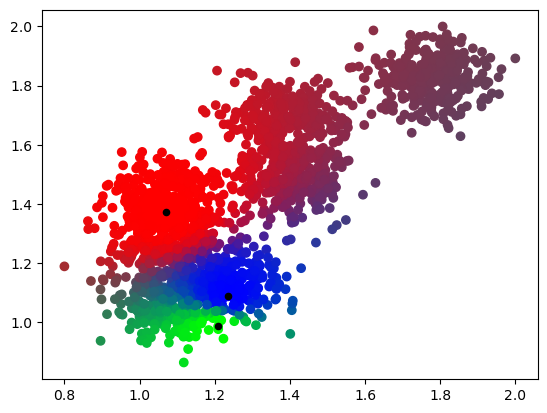

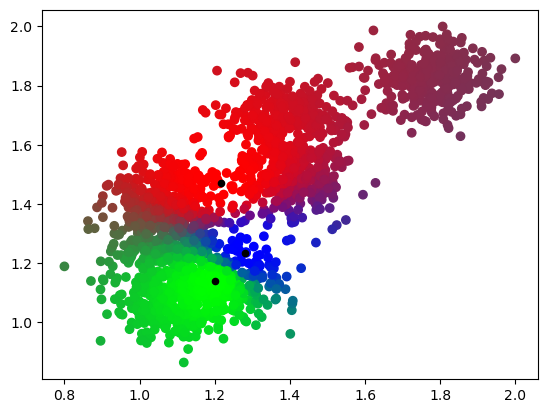

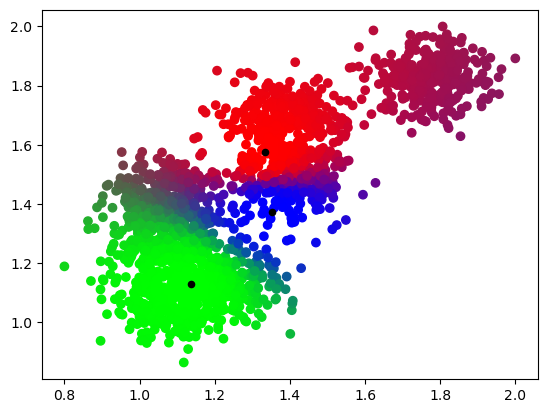

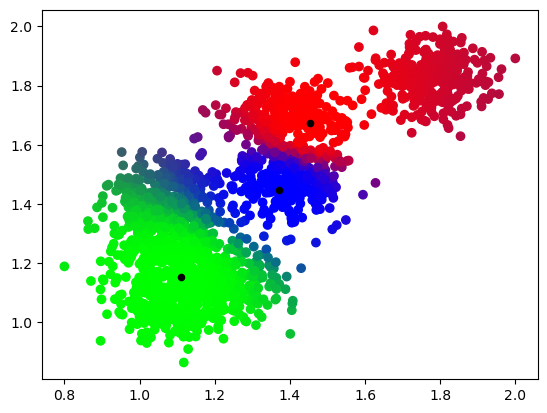

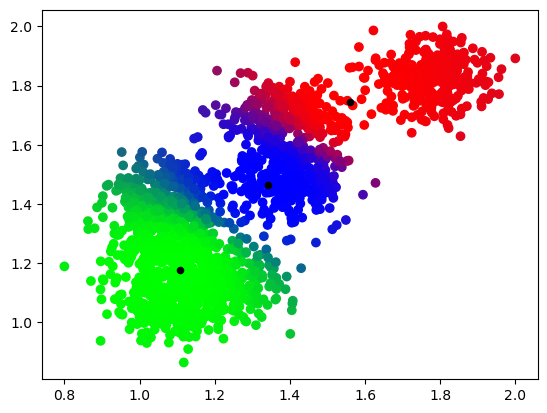

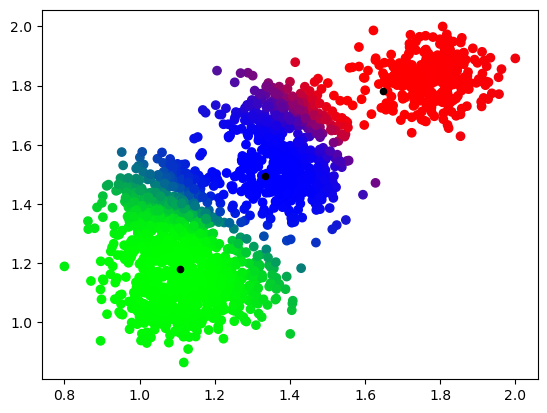

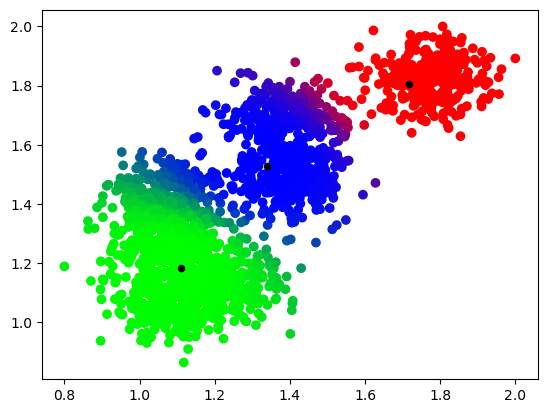

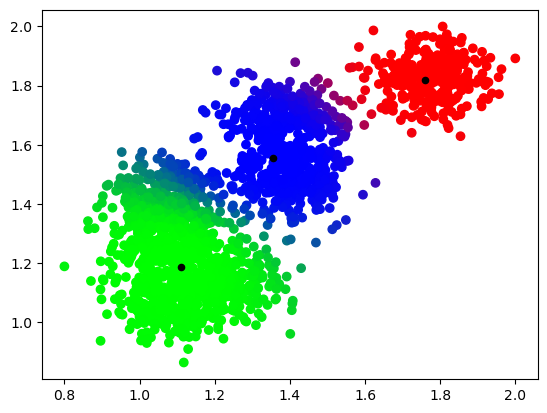

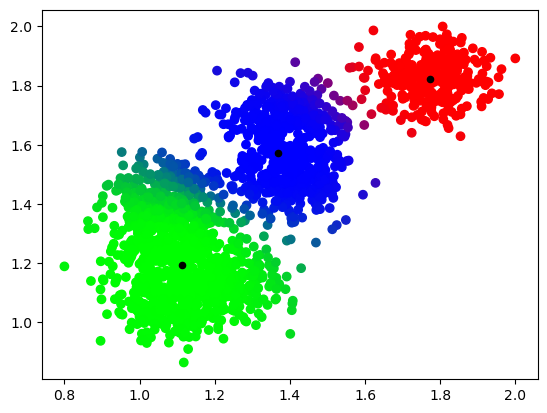

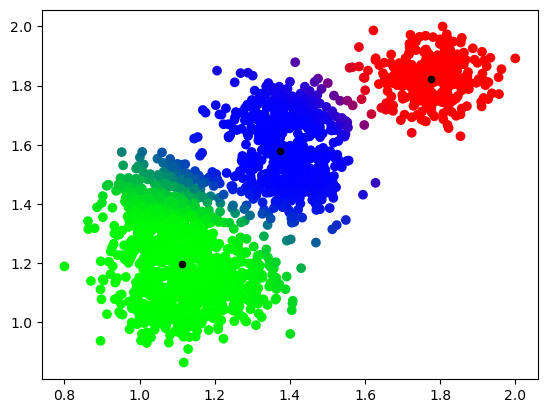

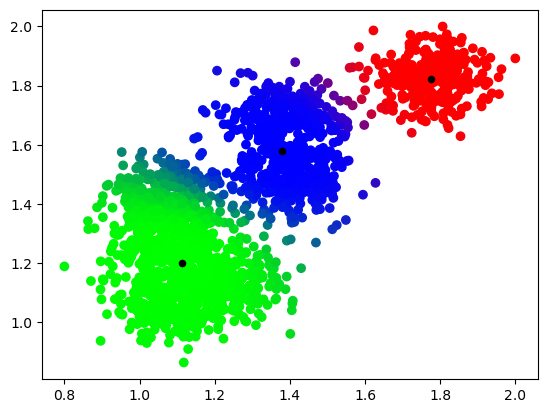

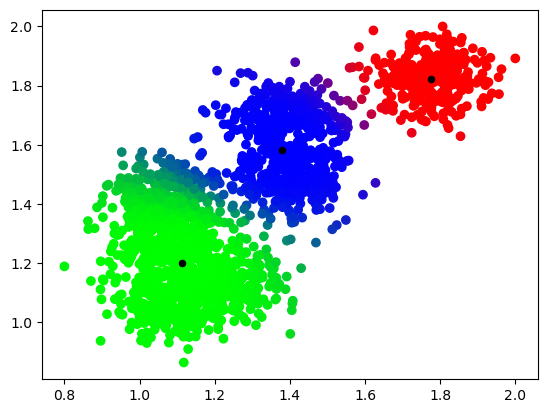

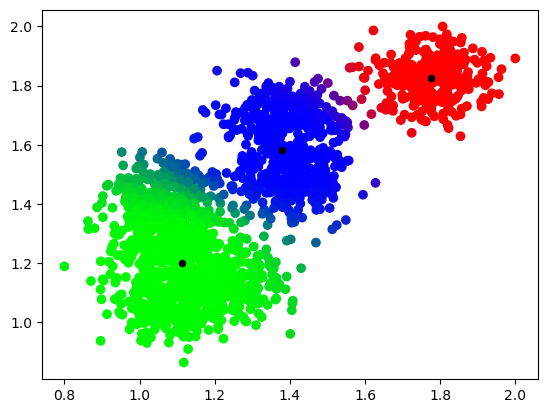

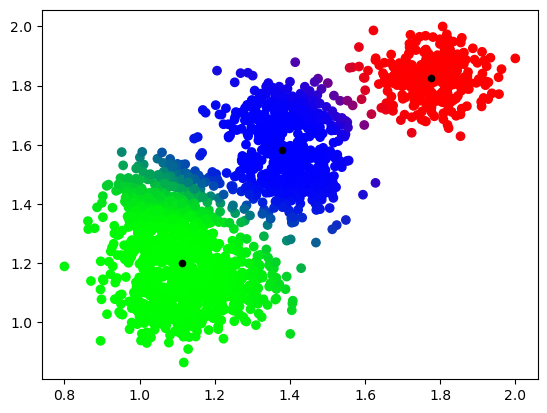

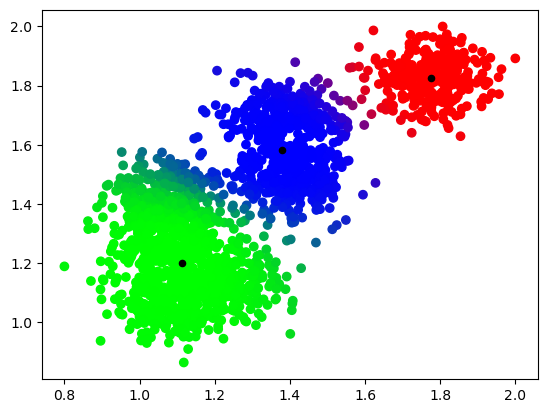

In [9]:
p = 0
dist = ((M - centroids[0]) ** 2)
for i in range(k - 1):
    dist0 = ((M - centroids[i + 1]) ** 2)
    dist = np.concatenate((dist, dist0))
dist = dist.reshape(k, N, 2)
dist = dist.sum(axis = 2)
dist = (1 / (dist + 0.0001)) ** (2 / (b - 1))
m = dist / dist.sum(axis=0)
print(m)

while True:
    plot(m, centroids, k)
    m = m ** b
    for i in range(k):
        centroids[i] = (m[i] * M.T).sum(axis=1) / m[i].sum()
    
    dist = ((M - centroids[0]) ** 2)
    for i in range(k - 1):
        dist0 = ((M - centroids[i + 1]) ** 2)
        dist = np.concatenate((dist, dist0))
    
    
    dist = dist.reshape(k, N, 2)
    dist = dist.sum(axis = 2)
    dist = (1 / (dist + 0.0001)) ** (2 / (b - 1))
    m = dist / dist.sum(axis=0)
    p+=1
    if p > max_iter - 1:
        break


In [11]:
print(m.T)

[[9.86496251e-01 4.77897519e-04 1.30258512e-02]
 [5.80349836e-04 9.87200046e-01 1.22196039e-02]
 [3.38443975e-04 9.95781283e-01 3.88027288e-03]
 ...
 [9.99798861e-01 1.49489376e-05 1.86190172e-04]
 [1.52583048e-01 5.72500732e-03 8.41691945e-01]
 [1.24475635e-02 9.86063460e-03 9.77691802e-01]]


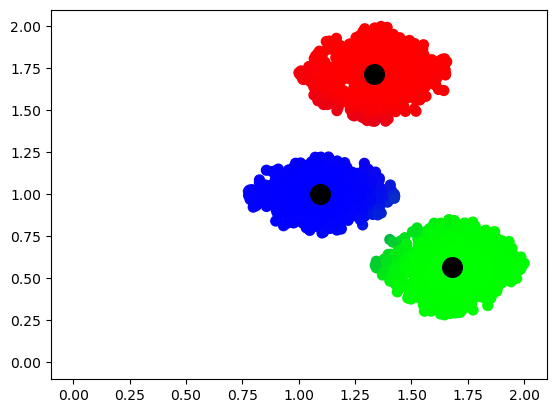

In [9]:
plot(m, centroids, k)

In [9]:
print(m.shape)

(3, 3000)


In [10]:
m = m > 0.5

In [11]:
m = m * 1

In [61]:
m.shape

(3, 3000)